## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

In [63]:
# !pip install pandas
# !pip install matplotlib

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [20]:
data = pd.read_csv("QueryResults.csv", header=0, names=["DATE", "TAG", "POSTS"])
type(data)

pandas.core.frame.DataFrame

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [66]:
data.head()
data.tail()

,DATE,TAG,POSTS
2393,2022-12-01,php,3103
2394,2022-12-01,python,20062
2395,2022-12-01,r,3738
2396,2022-12-01,ruby,404
2397,2022-12-01,swift,1530


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [67]:
size = data.shape
size[1], size[0]

(3, 2398)

**Challenge**: Count the number of entries in each column of the dataframe

In [33]:
data.count()

DATE     2398
TAG      2398
POSTS    2398
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [44]:
data.groupby("TAG").sum("POSTS")

,POSTS
TAG,
assembly,41902
c,390947
c#,1573653
c++,784673
delphi,50392
go,66479
java,1879446
javascript,2458676
perl,67378


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [48]:
data.groupby("TAG").count()

,DATE,POSTS
TAG,,
assembly,173,173
c,173,173
c#,174,174
c++,173,173
delphi,173,173
go,158,158
java,173,173
javascript,173,173
perl,173,173


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [52]:
data.DATE = pd.to_datetime(data.DATE)

In [53]:
type(data.DATE[1])

pandas._libs.tslibs.timestamps.Timestamp

## Data Manipulation



In [68]:
data.shape

(2398, 3)

**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [54]:
data.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,83
3,2008-08-01,c#,505
4,2008-08-01,c++,164


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [58]:
reshaped_df = data.pivot(index="DATE", columns="TAG", values="POSTS")
reshaped_df

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,505.0,164.0,14.0,NaN,222.0,163.0,28.0,158.0,120.0,NaN,70.0,NaN
2008-09-01,28.0,319.0,1644.0,754.0,104.0,NaN,1130.0,634.0,130.0,476.0,537.0,6.0,287.0,NaN
2008-10-01,16.0,304.0,1988.0,808.0,112.0,NaN,1149.0,723.0,127.0,611.0,507.0,NaN,247.0,NaN
2008-11-01,17.0,259.0,1730.0,734.0,141.0,NaN,957.0,580.0,97.0,500.0,450.0,1.0,158.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-01,177.0,1505.0,6335.0,3240.0,133.0,852.0,6529.0,15563.0,118.0,3764.0,21929.0,4342.0,476.0,1743.0
2022-09-01,191.0,1648.0,5741.0,3087.0,148.0,843.0,6260.0,14293.0,82.0,3389.0,20221.0,4025.0,474.0,1802.0
2022-10-01,242.0,2012.0,5816.0,3219.0,153.0,741.0,6517.0,14113.0,82.0,3383.0,22119.0,4530.0,436.0,1637.0


In [59]:
reshaped_df.fillna(0, inplace=True) 

In [60]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,83.0,505.0,164.0,14.0,0.0,222.0,163.0,28.0,158.0,120.0,0.0,70.0,0.0
2008-09-01,28.0,319.0,1644.0,754.0,104.0,0.0,1130.0,634.0,130.0,476.0,537.0,6.0,287.0,0.0
2008-10-01,16.0,304.0,1988.0,808.0,112.0,0.0,1149.0,723.0,127.0,611.0,507.0,0.0,247.0,0.0
2008-11-01,17.0,259.0,1730.0,734.0,141.0,0.0,957.0,580.0,97.0,500.0,450.0,1.0,158.0,0.0


## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

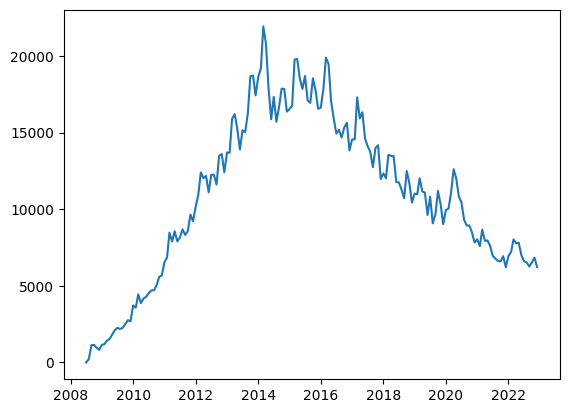

In [73]:
plt.plot(reshaped_df.index, reshaped_df.java)

Text(0, 0.5, 'Number of posts')

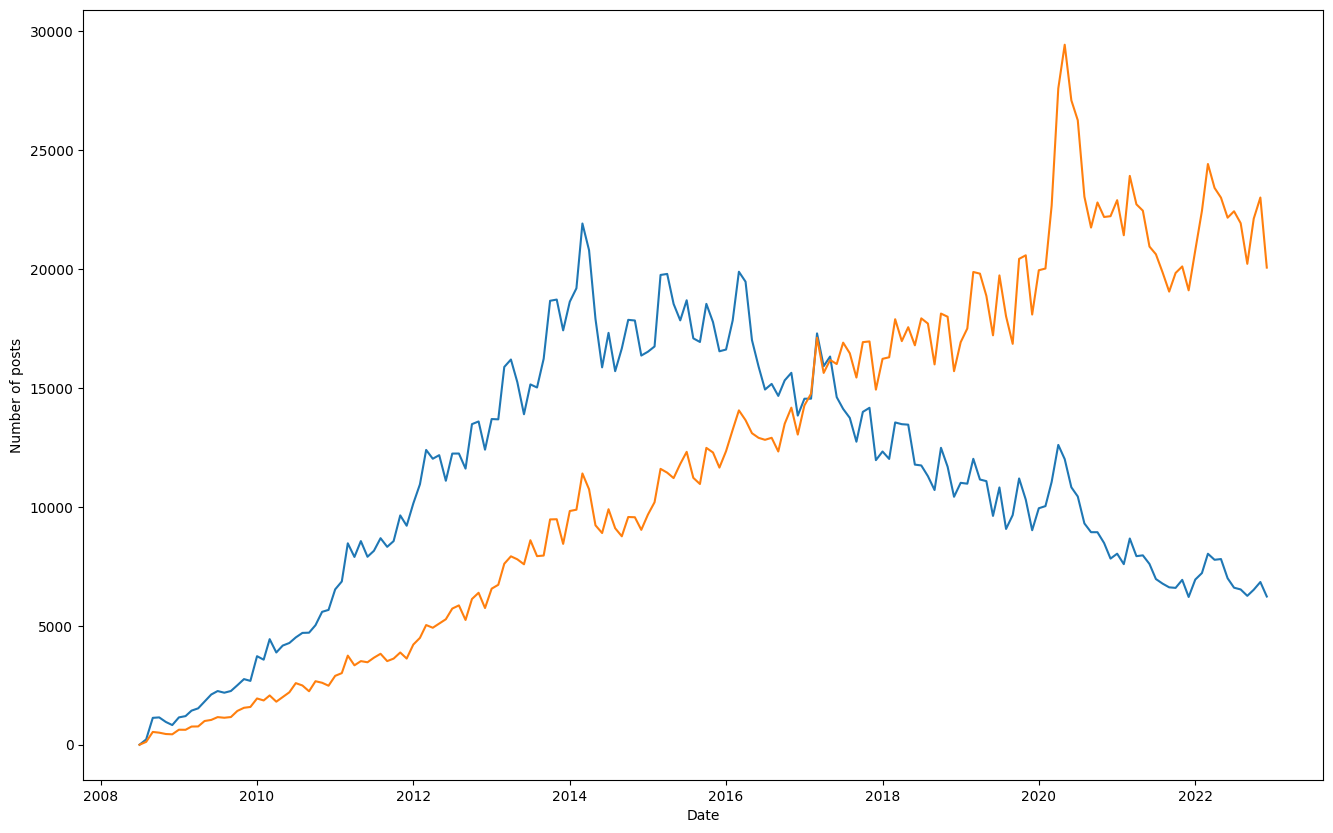

In [79]:
plt.figure(figsize=(16,10))
plt.plot(reshaped_df.index, reshaped_df.java, reshaped_df.index, reshaped_df.python)
plt.xlabel("Date")
plt.ylabel("Number of posts")

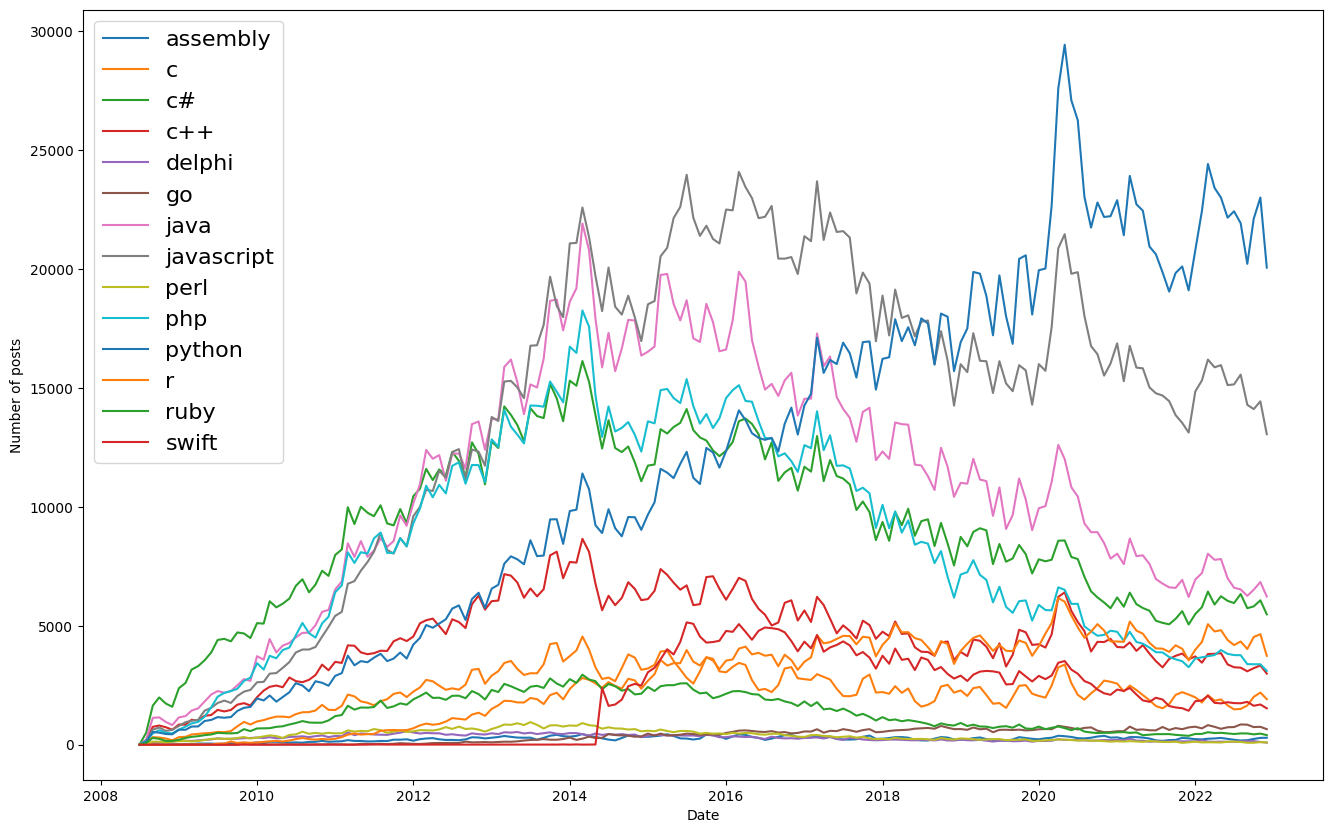

In [85]:
plt.figure(figsize=(16,10))
for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column], label=reshaped_df[column].name)
plt.xlabel("Date")
plt.ylabel("Number of posts")
plt.legend(fontsize=16)

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

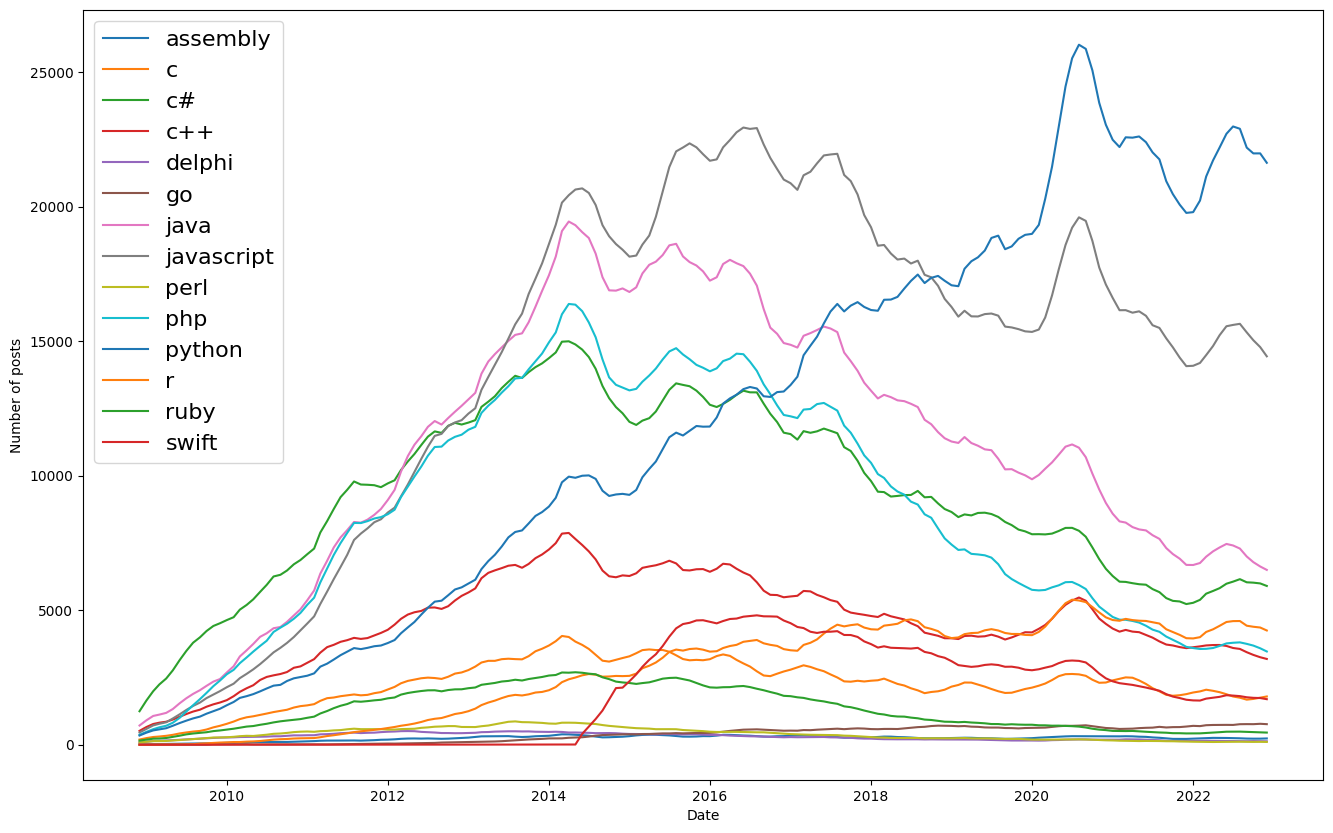

In [86]:
roll_df = reshaped_df.rolling(window=6).mean()
plt.figure(figsize=(16,10))
for column in reshaped_df.columns:
    plt.plot(roll_df.index, roll_df[column], label=roll_df[column].name)
plt.xlabel("Date")
plt.ylabel("Number of posts")
plt.legend(fontsize=16)